In [ ]:
import pandas as pd
import xarray as xr
import numpy as np
from scipy.signal import convolve2d
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("matched_lst_station_temp.parquet")

In [3]:
df.head()

elev     slope  aspect_cos  aspect_sin  \
time                y      x                                                    
2016-02-16 10:00:00 -33.15 18.02  19.705996  0.505718   -0.581291   -0.813696   
                           18.03  24.462826  0.318807    0.947378   -0.320116   
                           18.04  25.955309  0.748575    0.870594    0.492001   
                           18.10   6.762162  1.826431   -0.717692   -0.696360   
                           18.11   6.762162  1.826431   -0.717692   -0.696360   

                                   modis_LST  \
time                y      x                   
2016-02-16 10:00:00 -33.15 18.02  303.040009   
                           18.03  302.940002   
                           18.04  302.500000   
                           18.10  299.359985   
                           18.11  303.720001   

                                  station_ATLANTIS_INDUSTRIAL_CAPE_TOWN  \
time                y      x                                              
2016-02-16 10:00:00 -33.15 18.02                                    NaN   
                           18.03                                    NaN   
                           18.04                                    NaN   
                           18.10                                    NaN   
                           18.11                                    NaN   

                                  station_CAPE_TOWN_/_KIRSTENBOSCH  \
time                y      x                                         
2016-02-16 10:00:00 -33.15 18.02                               NaN   
                           18.03                               NaN   
                           18.04                               NaN   
                           18.10                               NaN   
                           18.11                               NaN   

                                  station_CT_AWS  station_GEELBEK  \
time                y      x                                        
2016-02-16 10:00:00 -33.15 18.02             NaN             26.6   
                           18.03             NaN             26.6   
                           18.04             NaN             26.6   
                           18.10             NaN             26.6   
                           18.11             NaN             26.6   

                                  station_JONKERSHOEK  station_LANGGEWENS  \
time                y      x                                                
2016-02-16 10:00:00 -33.15 18.02                  NaN                 NaN   
                           18.03                  NaN                 NaN   
                           18.04                  NaN                 NaN   
                           18.10                  NaN                 NaN   
                           18.11                  NaN                 NaN   

                                  station_MALMESBURY  \
time                y      x                           
2016-02-16 10:00:00 -33.15 18.02           28.200001   
                           18.03           28.200001   
                           18.04           28.200001   
                           18.10           28.200001   
                           18.11           28.200001   

                                  station_MOLTENO_RESERVIOR  station_PAARL  \
time                y      x                                                 
2016-02-16 10:00:00 -33.15 18.02                       21.0           27.5   
                           18.03                       21.0           27.5   
                           18.04                       21.0           27.5   
                           18.10                       21.0           27.5   
                           18.11                       21.0           27.5   

                                  station_ROBBEN_ISLAND  \
time                y      x                              
2016-02-16 10:00:00 -33.15 18.02   

In [21]:
reg_df = pd.read_parquet('regression_matchup_station_modis_lst.parquet')
reg_df.reset_index(inplace=True)

In [ ]:
station_cords = reg_df.drop_duplicates(subset='station_name')

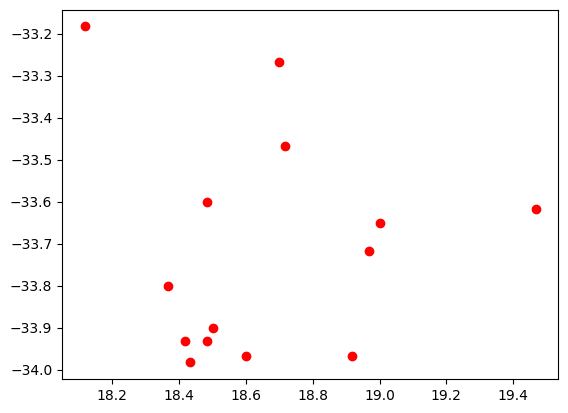

In [28]:
plt.scatter(station_cords['longitude'], station_cords['latitude'], c='red')

In [4]:
d_array = df.to_xarray()
x_array = d_array.modis_LST
x_array = x_array.astype(np.float32)

In [5]:
x_array

<xarray.DataArray 'modis_LST' (time: 523, y: 134, x: 158)> Size: 44MB
array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan, 302.52, ..., 305.52, 304.86, 303.88],
        [   nan, 301.08, 301.76, ..., 307.82, 307.56, 306.86],
        [303.04, 302.94, 302.5 , ..., 307.1 , 307.42, 307.38]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan, 303.04, ..., 310.74, 309.76, 309.26],
        [   nan, 304.46, 304.26, ..., 312.58, 311.92, 310.12],
        [306.96, 304.6 , 303.06, ..., 309.08, 312.18, 310.92]],

       [[   nan,    nan,    nan, ..., 306.44, 307.14, 308.  ],
        [   nan,    nan,    nan, ..., 307.14, 307.86, 308.74],
        [   nan,    nan,    nan, ..., 307.66, 308.32, 308.66],
        ...,
...
        [   nan,    nan, 300.  , ..., 303.62, 302.8 , 302.5 ],
        [   nan, 298.3 , 299.7 , ..., 303.94, 303.2 , 302.56],
        [299.62, 298.2 , 297.7 , ..., 303.  , 303.5 , 303.32]],

       [[   nan,    nan,    nan, ..., 301.42, 301.64, 301.74],
        [   nan,    nan,    nan, ..., 301.34, 301.42, 302.5 ],
        [   nan,    nan,    nan, ..., 302.08, 302.  , 302.46],
        ...,
        [   nan,    nan, 296.84, ..., 310.2 , 310.24, 310.32],
        [   nan, 297.88, 298.24, ..., 310.3 , 310.4 , 310.2 ],
        [299.24, 299.2 , 299.12, ..., 310.36, 310.46, 310.2 ]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [   nan,    nan, 297.28, ..., 310.2 , 310.24, 310.12],
        [   nan, 297.58, 297.54, ..., 310.66, 310.32, 309.48],
        [297.1 , 297.86, 297.52, ..., 309.56, 309.78, 309.64]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 2016-02-16T10:00:00 ... 2024-03-10T09:...
  * y        (y) float64 1kB -34.48 -34.47 -34.46 ... -33.17 -33.16 -33.15
  * x        (x) float64 1kB 18.02 18.03 18.04 18.05 ... 19.56 19.57 19.58 19.59

In [6]:
mask_array = ~np.isnan(x_array)
mask_array = mask_array.astype(np.float32)

lst_mask = mask_array.sum('time') > 0


In [7]:
frac_cover = (x_array.count(['x','y']) / lst_mask.sum())
good_cover = frac_cover > 0.90
good_cover.sum() / good_cover.size

<xarray.DataArray 'modis_LST' ()> Size: 8B
array(0.67112811)

In [8]:
good_cover.sum()

<xarray.DataArray 'modis_LST' ()> Size: 8B
array(351)

In [9]:
train = x_array.sel(time=good_cover)
test = x_array.sel(time=~good_cover)

In [10]:
train.time

<xarray.DataArray 'time' (time: 351)> Size: 3kB
array(['2016-02-29T10:00:00.000000000', '2016-03-03T10:00:00.000000000',
       '2016-03-12T10:00:00.000000000', ..., '2024-01-27T10:00:00.000000000',
       '2024-02-27T09:00:00.000000000', '2024-03-01T10:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2016-02-29T10:00:00 ... 2024-03-01T10:...

In [14]:
# checking for distribution of months in our Training set:

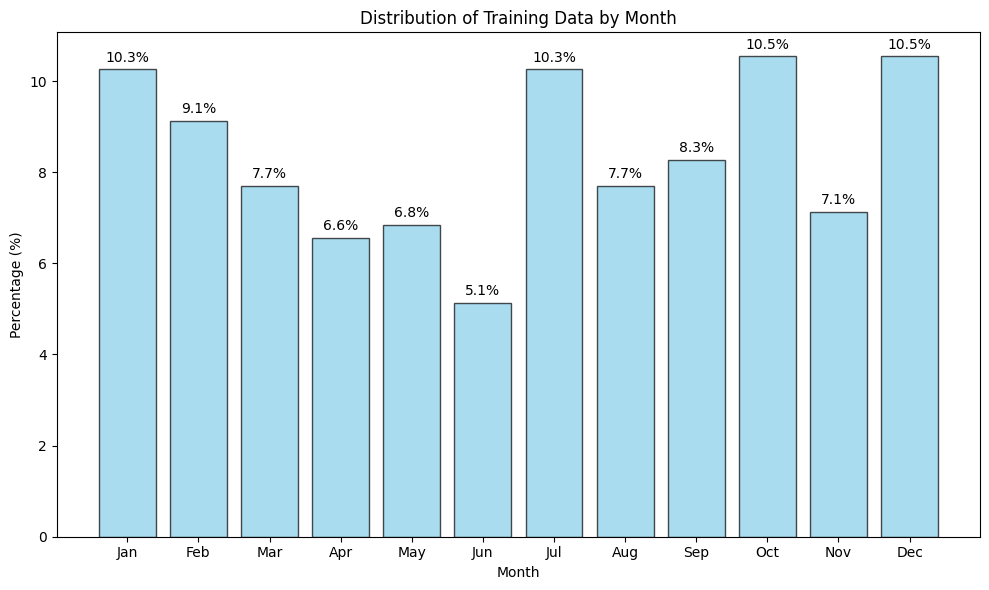

In [ ]:
# Extract month components from the time array
months = pd.to_datetime(train.time.values).month

month_counts = pd.Series(months).value_counts().sort_index()
month_percentages = (month_counts / month_counts.sum()) * 100

plt.figure(figsize=(10, 6))
plt.bar(month_percentages.index, month_percentages.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Training Data by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.grid(True, alpha=0.3)

# Adding percentage labels on top of bars
for i, v in enumerate(month_percentages.values):
   plt.text(month_percentages.index[i], v + max(month_percentages.values)*0.01, f'{v:.1f}%', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#checking Test Distribution similarly:

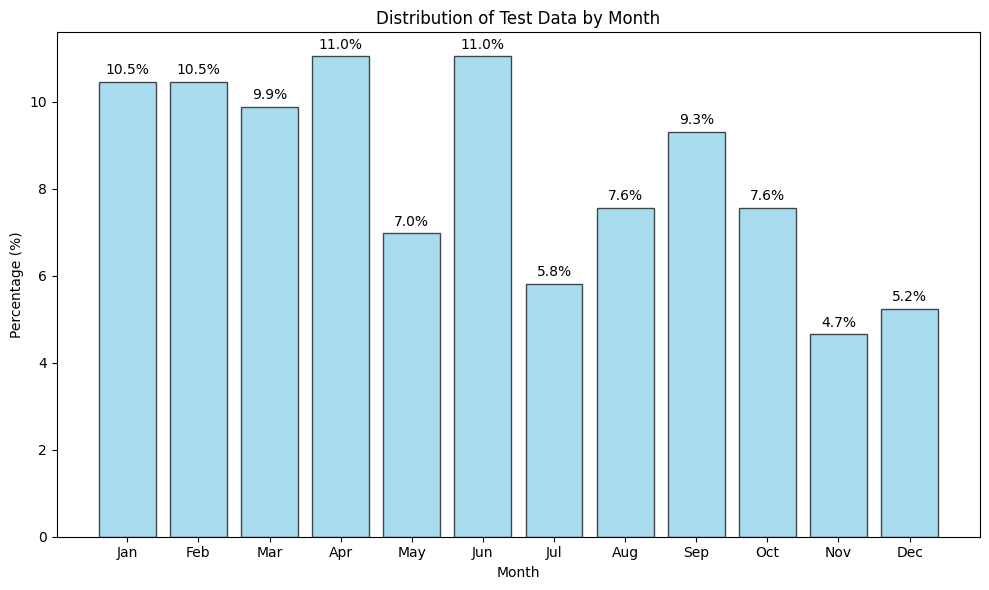

In [ ]:
months = pd.to_datetime(test.time.values).month

month_counts = pd.Series(months).value_counts().sort_index()
month_percentages = (month_counts / month_counts.sum()) * 100

plt.figure(figsize=(10, 6))
plt.bar(month_percentages.index, month_percentages.values, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Test Data by Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.grid(True, alpha=0.3)

for i, v in enumerate(month_percentages.values):
   plt.text(month_percentages.index[i], v + max(month_percentages.values)*0.01, f'{v:.1f}%', 
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

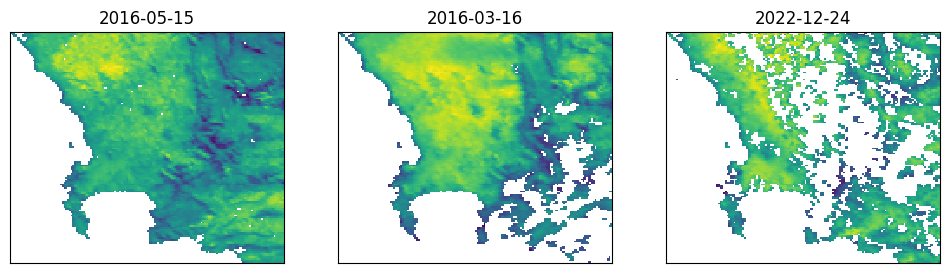

In [ ]:
# Plot showing varying degree of cloud cover

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Formatting dates
train[10].plot.imshow(ax=axes[0], cmap='viridis', add_colorbar=False)
axes[0].set_title(pd.to_datetime(train[10].time.values).strftime('%Y-%m-%d'))
axes[0].set_xlabel('')
axes[0].set_ylabel('')

test[3].plot.imshow(ax=axes[1], cmap='viridis', add_colorbar=False)
axes[1].set_title(pd.to_datetime(test[3].time.values).strftime('%Y-%m-%d'))
axes[1].set_xlabel('')
axes[1].set_ylabel('')

test[150].plot.imshow(ax=axes[2], cmap='viridis', add_colorbar=False)
axes[2].set_title(pd.to_datetime(test[150].time.values).strftime('%Y-%m-%d'))
axes[2].set_xlabel('')
axes[2].set_ylabel('')

# Remove axis ticks
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.2)
plt.show()

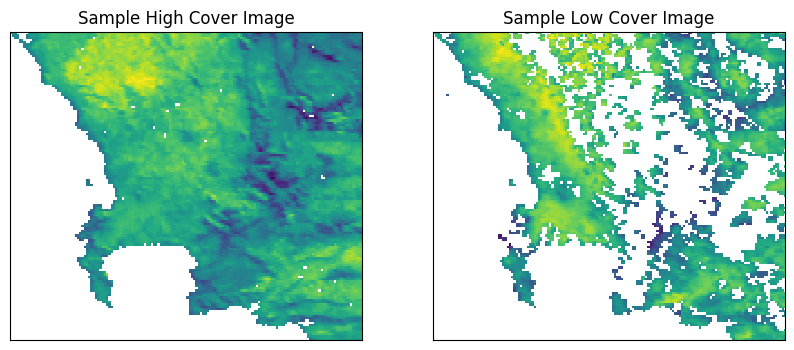

<Figure size 640x480 with 0 Axes>

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# train[10].plot.imshow(ax=axes[0], cmap='viridis', add_colorbar=False)
# axes[0].set_title("Sample High Cover Image")
# axes[0].set_xlabel('')
# axes[0].set_ylabel('')

# test[150].plot.imshow(ax=axes[1], cmap='viridis', add_colorbar=False)
# axes[1].set_title("Sample Low Cover Image")
# axes[1].set_xlabel('')
# axes[1].set_ylabel('')

# for ax in axes:
#     ax.set_xticks([])
#     ax.set_yticks([])

# plt.subplots_adjust(wspace=0.2)
# plt.show()

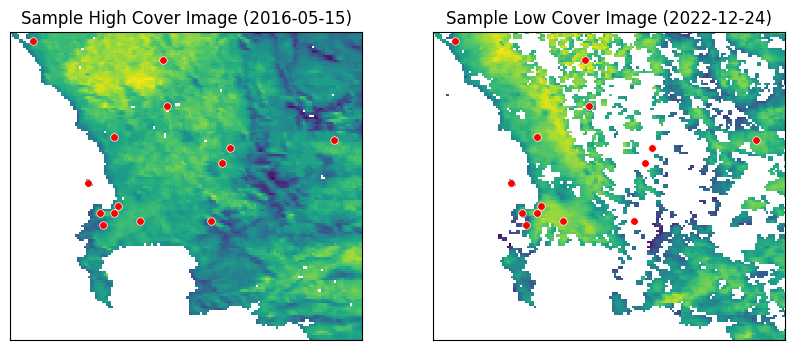

In [ ]:
# Plot of varying cloud cover with station locations
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

train[10].plot.imshow(ax=axes[0], cmap='viridis', add_colorbar=False)
axes[0].scatter(station_cords['longitude'], station_cords['latitude'], c='red', s=30, marker='o', edgecolors='white', linewidth=0.5)
date1 = pd.to_datetime(train[10].time.values).strftime('%Y-%m-%d')
axes[0].set_title(f"Sample High Cover Image ({date1})")
axes[0].set_xlabel('')
axes[0].set_ylabel('')

test[150].plot.imshow(ax=axes[1], cmap='viridis', add_colorbar=False)
axes[1].scatter(station_cords['longitude'], station_cords['latitude'], c='red', s=30, marker='o', edgecolors='white', linewidth=0.5)
date2 = pd.to_datetime(test[150].time.values).strftime('%Y-%m-%d')
axes[1].set_title(f"Sample Low Cover Image ({date2})")
axes[1].set_xlabel('')
axes[1].set_ylabel('')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.2)
plt.show()

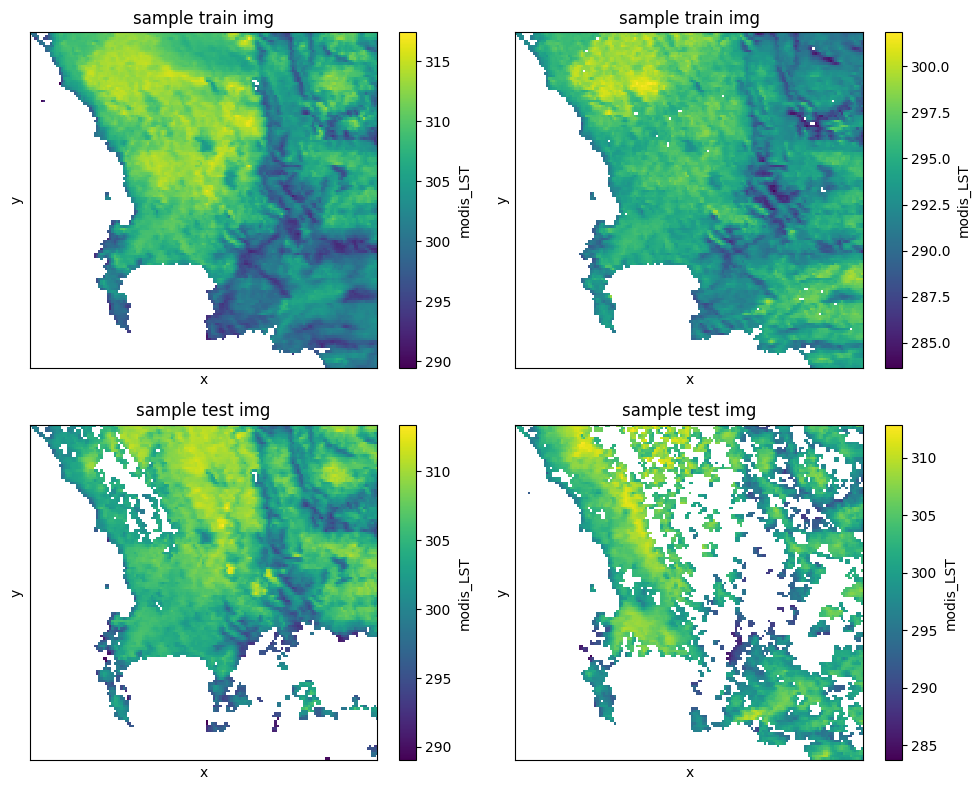

In [ ]:
# Plotting test and train samples

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot train samples
train[3].plot.imshow(ax=axes[0, 0], cmap='viridis')
axes[0, 0].set_title("sample train img")

train[10].plot.imshow(ax=axes[0, 1], cmap='viridis')
axes[0, 1].set_title("sample train img")

# Plot test samples
test[100].plot.imshow(ax=axes[1, 0], cmap='viridis')
axes[1, 0].set_title("sample test img")

test[150].plot.imshow(ax=axes[1, 1], cmap='viridis')
axes[1, 1].set_title("sample test img")

for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout();

### Preparing Data for training:

In [9]:
import os
import glob

In [10]:
good_imgs = x_array.sel(time=good_cover)
bad_imgs = x_array.sel(time=~good_cover)

In [25]:
len(good_imgs.time)

351

In [26]:
len(bad_imgs.time)

172

In [ ]:
## fixing 2D mask error

def create_training_pairs_xarray(good_imgs, bad_imgs, output_dir):
    """
    Create training pairs for the UNet model using xarray DataArrays.
    
    Args:
        good_imgs: xarray DataArray with good coverage LST data
        bad_imgs: xarray DataArray with poor coverage LST data  
        output_dir: Directory to save processed data
    """
    os.makedirs(output_dir, exist_ok=True)
    
    good_num_samples = len(good_imgs.time)
    bad_num_samples = len(bad_imgs.time)
    
    
    # Creating lists to store training pairs
    inputs = []
    masks = []
    targets = []
    target_masks = []
    
    for i in range(good_num_samples):
        # Get current LST image as numpy array
        lst_image = good_imgs.isel(time=i).values
        
        # Create mask for original image (1 for valid, 0 for missing)
        original_mask = ~np.isnan(lst_image)
        
        # Get a random cloud mask from bad sample image
        random_idx = np.random.choice(bad_num_samples)
        cloud_pattern = bad_imgs.isel(time=random_idx).values
        cloud_mask = np.isnan(cloud_pattern)
        
        # Apply additional masking to create input with more missing values
        input_image = lst_image.copy()
        extra_mask = cloud_mask & original_mask  # Only mask valid pixels
        input_image[extra_mask] = np.nan
        
        # Create input mask (1 for valid, 0 for missing)
        input_mask = ~np.isnan(input_image)
        
        # Replace NaN with 0 for network input
        input_image_filled = np.nan_to_num(input_image, nan=0)
        
        # Store the training pair
        inputs.append(input_image_filled)
        masks.append(input_mask.astype(np.float32))
        targets.append(np.nan_to_num(lst_image, nan=0))
        target_masks.append(original_mask.astype(np.float32))
    
    # Convert to numpy arrays
    inputs = np.array(inputs)
    masks = np.array(masks)
    targets = np.array(targets)
    target_masks = np.array(target_masks)
     
    # Add channel dimension for CNN (height, width, channels)
    inputs = inputs[..., np.newaxis]
    masks = masks[..., np.newaxis]
    targets = targets[..., np.newaxis]
    target_masks = target_masks[..., np.newaxis]
    
    # Save training data
    np.save(os.path.join(output_dir, "train_inputs.npy"), inputs)
    np.save(os.path.join(output_dir, "train_masks.npy"), masks)
    np.save(os.path.join(output_dir, "train_targets.npy"), targets)
    np.save(os.path.join(output_dir, "train_target_masks.npy"), target_masks)
    
    print(f"Training data saved to {output_dir}")
    
    return inputs, masks, targets, target_masks

In [38]:
inputs, masks, targets, target_masks = create_training_pairs_xarray(good_imgs, bad_imgs, './data')

Training data saved to ./data


In [20]:
# create Test set using bad imgs:
test_inputs = []
test_masks = []
output_dir  = './data'

for i in range(len(bad_imgs.time)):

    lst_image = bad_imgs.isel(time=i).values
    original_mask = ~np.isnan(lst_image)
    input_image_filled = np.nan_to_num(lst_image, nan=0)    

    test_inputs.append(input_image_filled)
    test_masks.append(original_mask)

inputs_tst = np.array(test_inputs)
masks_tst = np.array(test_masks)

# inputs_tst = inputs_tst[..., np.newaxis]
# masks_tst = masks_tst[..., np.newaxis]
inputs_tst = inputs_tst.reshape((*inputs_tst.shape, 1))
masks_tst = masks_tst.reshape((*masks_tst.shape, 1))


inputs_tst = np.transpose(inputs_tst, (0, 3, 1, 2))
masks_tst = np.transpose(masks_tst, (0, 3, 1, 2))


np.save(os.path.join(output_dir, "test_inputs.npy"), inputs_tst)
np.save(os.path.join(output_dir, "test_masks.npy"), masks_tst)